In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
df = pd.read_csv('C:/Users/sreej/OneDrive/Desktop/Datascience.csv')

Based on Cooking recipes - Recipe Reviews and User Feedback

# DEEP LEARNING CLASSIFICATION

In [ ]:
df

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,1622717977,0,0,0,5,100,This Strawberry Cake has been a family favorit...
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,1613036720,0,0,0,5,100,<p>I received endless compliments on this cake...
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,1622717844,0,0,0,5,100,This cake was delicious and so moist! I didn&#...
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,1622717233,0,0,0,5,100,I just made this too. It is wonderful. As fo...


In [ ]:
df.describe()

,num_records,recipe_number,recipe_code,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score
count,18182.000000,18182.000000,18182.000000,18182.000000,1.818200e+04,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000
mean,121.465295,38.689363,21773.667253,2.159608,1.623710e+09,0.014630,1.089264,0.549335,4.288802,153.162138
std,116.747893,29.786647,23965.109637,10.014666,5.468697e+06,0.137974,4.201004,3.470124,1.544786,141.075316
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6086.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,150.000000,64.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,520.000000,1.665756e+09,3.000000,106.000000,126.000000,5.000000,946.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       18182 non-null  int64 
 1   recipe_number    18182 non-null  int64 
 2   recipe_code      18182 non-null  int64 
 3   recipe_name      18182 non-null  object
 4   comment_id       18182 non-null  object
 5   user_id          18182 non-null  object
 6   user_name        18182 non-null  object
 7   user_reputation  18182 non-null  int64 
 8   created_at       18182 non-null  int64 
 9   reply_count      18182 non-null  int64 
 10  thumbs_up        18182 non-null  int64 
 11  thumbs_down      18182 non-null  int64 
 12  stars            18182 non-null  int64 
 13  best_score       18182 non-null  int64 
 14  text             18180 non-null  object
dtypes: int64(10), object(5)
memory usage: 2.1+ MB


In [ ]:
#Dropping variables
df.isnull().sum()
df.dropna()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,1622717977,0,0,0,5,100,This Strawberry Cake has been a family favorit...
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,1613036720,0,0,0,5,100,<p>I received endless compliments on this cake...
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,1622717844,0,0,0,5,100,This cake was delicious and so moist! I didn&#...
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,1622717233,0,0,0,5,100,I just made this too. It is wonderful. As fo...


In [ ]:
#Fixing the column name
df.rename(columns={'Unnamed: 0': 'num_records'}, inplace=True)

In [ ]:
#Change "created at" variable to univerex to UTC

df['created_at_utc'] = pd.to_datetime(df['created_at'], unit='s', utc=True)

In [ ]:
df.head(5)

,num_records,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,created_at_utc
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ...",2022-10-13 00:11:29+00:00
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...,2022-10-09 01:08:07+00:00
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...,2022-09-28 22:35:57+00:00
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee...",2022-08-29 15:43:28+00:00
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...,2022-10-04 20:03:43+00:00


In [ ]:
df['created_at_utc'].describe()

count                                  18182
mean     2021-06-14 22:41:25.783631872+00:00
min                2021-02-11 09:22:16+00:00
25%                2021-06-03 10:47:19+00:00
50%                2021-06-03 10:55:07+00:00
75%                2021-06-03 11:02:51+00:00
max                2022-10-14 14:00:35+00:00
Name: created_at_utc, dtype: object

In [ ]:
# Group by recipe_number and compute summary statistics
summary_stats = df.groupby('recipe_number').agg(
    total_comments=('comment_id', 'count'),       # Count of comments
    avg_user_reputation=('user_reputation', 'mean'),  # Average user reputation
    avg_reply_count=('reply_count', 'mean'),     # Average reply count
    avg_thumbs_up=('thumbs_up', 'mean'),         # Average thumbs up
    avg_thumbs_down=('thumbs_down', 'mean'),     # Average thumbs down
    avg_star_rating=('stars', 'mean'),           # Average star rating
    avg_best_score=('best_score', 'mean')        # Average best score
).reset_index()

# Display the results
summary_stats.head(10)

,recipe_number,total_comments,avg_user_reputation,avg_reply_count,avg_thumbs_up,avg_thumbs_down,avg_star_rating,avg_best_score
0,1,654,1.469419,0.015291,0.507645,0.221713,4.452599,130.729358
1,2,509,2.129666,0.009823,0.320236,0.129666,4.587426,126.222004
2,3,725,1.626207,0.022069,1.012414,0.673103,4.576552,136.362759
3,4,338,3.011834,0.008876,2.872781,0.970414,4.526627,191.952663
4,5,197,1.477157,0.000000,0.131980,0.065990,4.461929,111.751269
5,6,395,1.379747,0.015190,0.921519,0.377215,4.513924,153.810127
6,7,368,1.877717,0.010870,0.785326,0.456522,4.608696,160.855978
7,8,241,1.070539,0.008299,1.286307,1.087137,4.082988,157.103734
8,9,421,1.327791,0.004751,0.491686,0.190024,4.099762,123.456057
9,10,332,2.259036,0.006024,0.638554,0.361446,4.632530,162.746988


In [ ]:

# Add a ratio column for thumbs up to thumbs down
summary_stats['thumbs_up_to_down_ratio'] = summary_stats['avg_thumbs_up'] / summary_stats['avg_thumbs_down']

# Handle cases where thumbs down is 0 to avoid division by zero
summary_stats['thumbs_up_to_down_ratio'] = summary_stats['thumbs_up_to_down_ratio'].replace([float('inf'), -float('inf')], None).fillna(0)

# Display the updated summary table
summary_stats.head(10)

,recipe_number,total_comments,avg_user_reputation,avg_reply_count,avg_thumbs_up,avg_thumbs_down,avg_star_rating,avg_best_score,thumbs_up_to_down_ratio
0,1,654,1.469419,0.015291,0.507645,0.221713,4.452599,130.729358,2.289655
1,2,509,2.129666,0.009823,0.320236,0.129666,4.587426,126.222004,2.469697
2,3,725,1.626207,0.022069,1.012414,0.673103,4.576552,136.362759,1.504098
3,4,338,3.011834,0.008876,2.872781,0.970414,4.526627,191.952663,2.960366
4,5,197,1.477157,0.000000,0.131980,0.065990,4.461929,111.751269,2.000000
5,6,395,1.379747,0.015190,0.921519,0.377215,4.513924,153.810127,2.442953
6,7,368,1.877717,0.010870,0.785326,0.456522,4.608696,160.855978,1.720238
7,8,241,1.070539,0.008299,1.286307,1.087137,4.082988,157.103734,1.183206
8,9,421,1.327791,0.004751,0.491686,0.190024,4.099762,123.456057,2.587500
9,10,332,2.259036,0.006024,0.638554,0.361446,4.632530,162.746988,1.766667


In [ ]:
summary_stats.tail(10)

,recipe_number,total_comments,avg_user_reputation,avg_reply_count,avg_thumbs_up,avg_thumbs_down,avg_star_rating,avg_best_score
90,91,86,1.325581,0.000000,0.127907,0.023256,3.302326,110.151163
91,92,114,4.500000,0.008772,3.114035,1.692982,4.570175,219.684211
92,93,110,2.590909,0.000000,0.718182,0.536364,4.327273,149.927273
93,94,96,3.197917,0.020833,1.583333,1.197917,4.395833,169.958333
94,95,96,3.052083,0.010417,0.812500,0.885417,4.291667,139.906250
95,96,109,2.211009,0.000000,0.348624,0.256881,4.440367,143.623853
96,97,86,2.430233,0.000000,0.372093,0.220930,3.976744,132.000000
97,98,128,6.539062,0.007812,2.992188,1.562500,4.390625,224.265625
98,99,112,4.017857,0.000000,1.258929,0.535714,4.258929,188.821429
99,100,119,3.336134,0.033613,1.554622,0.789916,4.369748,208.865546


In [ ]:
df['best_score'].value_counts(ascending=False)

best_score
100    14002
193     1449
253      376
142      201
297      171
       ...  
227        1
905        1
499        1
719        1
889        1
Name: count, Length: 588, dtype: int64

In [ ]:
df['recipe_number'].value_counts()

recipe_number
3     725
1     654
2     509
9     421
13    397
     ... 
56     96
72     90
91     86
97     86
61     31
Name: count, Length: 100, dtype: int64

In [ ]:
#How many users are there

df['user_name'].value_counts()

user_name
2124arizona        28
JGa2595176         27
mjlouk             25
No_Time_To_Cook    25
justmbeth          23
                   ..
MissGladysL         1
lamonli             1
Anni23554           1
ClaudiaElders       1
cafritz             1
Name: count, Length: 13586, dtype: int64

Dataframe is already based top receipe (With recipe number = 1)

In [ ]:
top_recipes = df.groupby(['recipe_number', 'recipe_name']).size().reset_index(name='total_comments')

top10 = top_recipes.sort_values(by='recipe_number', ascending=True)

top10.head(10)


,recipe_number,recipe_name,total_comments
0,1,Creamy White Chili,654
1,2,Best Ever Banana Bread,509
2,3,Cheeseburger Soup,725
3,4,Amish Breakfast Casserole,338
4,5,Pumpkin Spice Cupcakes with Cream Cheese Frosting,197
5,6,Favorite Chicken Potpie,395
6,7,Flavorful Chicken Fajitas,368
7,8,Apple Pie,241
8,9,Enchilada Casser-Ole!,421
9,10,Zucchini Pizza Casserole,332


In [ ]:
recipe_total = df.groupby('recipe_number')
recipe_total

In [ ]:
#Trying to understand the number of stars for each recipe number, what are the weights for each rating number

# Recipe 3 has more 5 stars and less 0 stars than recipe 1.... why is that? - Is the ratio different between 1,2 and 3

star_counts = df.groupby(['recipe_number', 'stars']).size().unstack(fill_value=0)
print("\nStar Counts for Each Recipe:")
print(star_counts)


Star Counts for Each Recipe:
stars           0  1  2   3   4    5
recipe_number                       
1              53  6  2  10  43  540
2              24  7  7   8  25  438
3              25  9  8  22  78  583
4              15  4  4  11  35  269
5              16  2  0   5   8  166
...            .. .. ..  ..  ..  ...
96              7  1  0   3  16   82
97             10  3  3   3  11   56
98              8  3  0   8  10   99
99              6  4  2   5  21   74
100             6  2  4   6  13   88

[100 rows x 6 columns]


In [ ]:
#What is the ratio of 5 stars compared to other stars for each recipe

# Count total ratings for each recipe
total_counts = df.groupby('recipe_number').size().reset_index(name='total_ratings')

# Count 5-star ratings for each recipe
five_star_counts = df[df['stars'] == 5].groupby('recipe_number').size().reset_index(name='five_star_count')

# Merge total ratings and 5-star ratings
merged_counts = pd.merge(total_counts, five_star_counts, on='recipe_number', how='left')

# Fill NaN values in five_star_count (for recipes without any 5-star ratings) with 0
merged_counts['five_star_count'] = merged_counts['five_star_count'].fillna(0)

# Calculate the ratio of 5-star ratings to total ratings
merged_counts['five_star_ratio'] = merged_counts['five_star_count'] / merged_counts['total_ratings']

# Display the results
print("Five-Star Ratio for Each Recipe:")
print(merged_counts[['recipe_number', 'five_star_ratio']])

Five-Star Ratio for Each Recipe:
    recipe_number  five_star_ratio
0               1         0.825688
1               2         0.860511
2               3         0.804138
3               4         0.795858
4               5         0.842640
..            ...              ...
95             96         0.752294
96             97         0.651163
97             98         0.773438
98             99         0.660714
99            100         0.739496

[100 rows x 2 columns]


What are some other weights that would influence reviews
- Comments (Metrics) : Reviews can be weighted by who is reviewing the recipe as well
    - Engagement
        - Thumbs up / down for a comment
        - How many Replies the comment gets

- User characteristics (Reputation of the user)

### Engagement Metrics

In [ ]:
# For users who didnt rate the recipe a level of stars, what should we do about this?
df[df['stars'] == 0]

,num_records,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,created_at_utc
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee...",2022-08-29 15:43:28+00:00
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...,2022-10-04 20:03:43+00:00
7,7,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_24cuIEu6UoJvd5VRMAoqnTPR9wd,u_uj79hCc4xVhm,Towanka,1,1643942114,0,28,2,0,891,This is delicious and I make it often. One suc...,2022-02-04 02:35:14+00:00
23,23,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_1vFabyuTl4d81ivTsJDdxKOnb0c,u_PbmqE1O8NisP,Carole368,1,1626160365,1,5,29,0,530,This is just White Chicken Chili with I first ...,2021-07-13 07:12:45+00:00
29,29,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_429116,u_1oKdQHNslBwfe7Rqe9Sg1ihg9Fs,Sue,1,1622648882,0,3,0,0,297,I would make this soup again. It was a hit. ...,2021-06-02 15:48:02+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18073,10,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_22bz3eijaJVHwIq6U1DNof4sofy,u_YVoGFuOfODqd,Brenda95,1,1645656112,0,13,5,0,759,I just made this for the first time. I haven&#...,2022-02-23 22:41:52+00:00
18075,12,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_433901,u_1tOHv6m9wvBiAUjxjq5wafhtd8y,CyanSnow,0,1622648876,2,4,16,0,136,"Waste of time and ingredients, cake ran over n...",2021-06-02 15:47:56+00:00
18103,40,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_382008,u_1oKcYtpym8MXOYhOI4nazwiulh1,susan croteau,1,1622718208,0,1,0,0,193,Can this cake be frozen?,2021-06-03 11:03:28+00:00
18126,63,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_233438,u_1oKXwltYerSFRssptbVx8eCKbyc,LutherHaith,1,1622717517,0,0,0,0,100,Love it making another one keep up the good w...,2021-06-03 10:51:57+00:00


In [ ]:
df.sort_values(by='best_score', ascending=False).reset_index().head(10)

,index,num_records,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,created_at_utc
0,9758,4,37,20170,Taco Lasagna,sp_aUSaElGf_20170_c_1xZvP3lT0IAJGAbyyU9EQBjHl0O,u_IvqsrnOAh4bF,CYNTHIA534,1,1630575397,1,42,0,5,946,"With only 2 of us at home now, I make this usi...",2021-09-02 09:36:37+00:00
1,16751,11,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_21NdrStVi516k1e7nOSv6zuijrM,u_LA8nIIJWwFv8,Librartist,10,1637785678,1,41,0,5,934,Instead of a cans of chopped chilies and cans ...,2021-11-24 20:27:58+00:00
2,11168,13,46,18345,Simple Au Gratin Potatoes,sp_aUSaElGf_18345_c_1zh7UbnxXFCNCAYBGPmHhMfi8wX,u_mMj2pk5kz3wY,Ruth147,1,1634588483,0,28,0,5,931,"I followed the recipe, using whole milk and ex...",2021-10-18 20:21:23+00:00
3,4802,22,13,32480,Basic Homemade Bread,sp_aUSaElGf_32480_c_1umDByGZhUI4nqhPFfgR0kG30lx,u_1ZU3BHN3WsQZ,Ashley748,1,1625261738,0,27,0,5,928,"This came out fabulous! Love this recipe, both...",2021-07-02 21:35:38+00:00
4,1178,15,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_24YuhGmcHjbhNjPBO7wwzOtowd1,u_j6XdnbRT1vtZ,Joan9859,1,1643819958,0,36,1,5,928,"Very good! To save using an extra pan, I did n...",2022-02-02 16:39:18+00:00
5,7761,8,26,386,Hot Milk Cake,sp_aUSaElGf_386_c_1ybGEs91lVCmxcU68a6xDxIgq5t,u_MpGWeTdks32r,sligoe,1,1632512765,0,41,2,0,922,This is very similar to the recipe I grew up w...,2021-09-24 19:46:05+00:00
6,14928,1,74,26937,Pineapple Pudding Cake,sp_aUSaElGf_26937_c_20wH4ShRVOK9xRNEmv5XkldLThn,u_pUpkJ4EIW2Nb,chicagokathy,20,1636948538,1,44,2,4,922,Light and delicious! The directions were a bit...,2021-11-15 03:55:38+00:00
7,15846,8,81,27626,Skillet Shepherd’s Pie,sp_aUSaElGf_27626_c_1uxbzcBOQlrOHmfNa6ZeA6LNAp6,u_Hl0Idveqecgi,Debbie549,1,1625610450,0,32,1,5,918,This recipe is wonderful as written. It&#39;s...,2021-07-06 22:27:30+00:00
8,13338,9,62,1152,Pork Chops with Scalloped Potatoes,sp_aUSaElGf_1152_c_1yp07wPLhCUmuEb9VIBKFOcIxvV,u_YAcwSJOH6Znt,buckey15002,1,1632933058,0,42,2,4,914,Very good and flavourful. Brown the chops fir...,2021-09-29 16:30:58+00:00
9,11455,8,48,9739,Best Ever Potato Soup,sp_aUSaElGf_9739_c_25REWw0HQtMMgLKsiWJU7Qivs2l,u_nG4163EIIvTI,Judy021,1,1645481533,1,27,0,4,912,"Fixed this just as recipe stated, but it was m...",2022-02-21 22:12:13+00:00


In [ ]:
df.groupby('recipe_number')['thumbs_up'].sum().reset_index()

,recipe_number,thumbs_up
0,1,332
1,2,163
2,3,734
3,4,971
4,5,26
...,...,...
95,96,38
96,97,32
97,98,383
98,99,141


### User Metrics (Characteristics and Reputation)

In [ ]:
# Group by user_name and compute metrics
user_metrics = df.groupby('user_name').agg(
    total_comments=('comment_id', 'count'),        # Total number of comments
    total_user_reputation=('user_reputation', 'count'),  # Average user reputation
    total_reply_count=('reply_count', 'mean'),
    avg_reply_count=('reply_count', 'mean'),       # Average reply count
    total_thumbs_up=('thumbs_up', 'count'),
    avg_thumbs_up=('thumbs_up', 'mean'),           # Average thumbs up
    avg_thumbs_down=('thumbs_down', 'mean'),       # Average thumbs down
    total_thumbs_down=('thumbs_down', 'count'),
    avg_star_rating=('stars', 'mean'),             # Average star rating
    avg_best_score=('best_score', 'mean')          # Average best score
).reset_index()

# Display the user metrics - Most engaging users
user_metrics.sort_values(by='total_comments', ascending=False)

,user_name,total_comments,total_user_reputation,total_reply_count,avg_reply_count,total_thumbs_up,avg_thumbs_up,avg_thumbs_down,total_thumbs_down,avg_star_rating,avg_best_score
53,2124arizona,28,28,0.00,0.00,28,1.107143,0.214286,28,5.000000,183.464286
2768,JGa2595176,27,27,0.00,0.00,27,1.592593,0.259259,27,4.555556,212.592593
5017,No_Time_To_Cook,25,25,0.00,0.00,25,0.840000,0.480000,25,4.720000,179.480000
11180,mjlouk,25,25,0.04,0.04,25,0.360000,0.040000,25,4.560000,163.360000
9744,justmbeth,23,23,0.00,0.00,23,0.304348,0.086957,23,4.956522,119.478261
...,...,...,...,...,...,...,...,...,...,...,...
4792,MooMooPIE11,1,1,0.00,0.00,1,0.000000,0.000000,1,5.000000,100.000000
4793,Moonbeam77,1,1,0.00,0.00,1,0.000000,0.000000,1,4.000000,100.000000
4794,Moonchach,1,1,0.00,0.00,1,0.000000,1.000000,1,1.000000,100.000000
4795,Moonstarz,1,1,0.00,0.00,1,1.000000,0.000000,1,5.000000,193.000000


In [ ]:
#Seems as if thumbs up has a higher weight in terms of generating a higher score

user_metrics.sort_values(by='avg_best_score', ascending=False)

,user_name,total_comments,total_user_reputation,total_reply_count,avg_reply_count,total_thumbs_up,avg_thumbs_up,avg_thumbs_down,total_thumbs_down,avg_star_rating,avg_best_score
5585,Ruth147,1,1,0.0,0.0,1,28.0,0.0,1,5.0,931.0
463,Ashley748,1,1,0.0,0.0,1,27.0,0.0,1,5.0,928.0
12628,sligoe,1,1,0.0,0.0,1,41.0,2.0,1,0.0,922.0
1531,Debbie549,1,1,0.0,0.0,1,32.0,1.0,1,5.0,918.0
3239,Judy021,1,1,1.0,1.0,1,27.0,0.0,1,4.0,912.0
...,...,...,...,...,...,...,...,...,...,...,...
2407,Guest5824,1,1,0.0,0.0,1,0.0,6.0,1,5.0,0.0
2408,Guest586,1,1,0.0,0.0,1,0.0,3.0,1,0.0,0.0
457,AshenOne,1,1,0.0,0.0,1,0.0,20.0,1,0.0,0.0
8463,dusk5633,1,1,1.0,1.0,1,0.0,25.0,1,0.0,0.0


In [ ]:
df[df['user_name'] == 'Ruth147']

,num_records,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,created_at_utc
11168,13,46,18345,Simple Au Gratin Potatoes,sp_aUSaElGf_18345_c_1zh7UbnxXFCNCAYBGPmHhMfi8wX,u_mMj2pk5kz3wY,Ruth147,1,1634588483,0,28,0,5,931,"I followed the recipe, using whole milk and ex...",2021-10-18 20:21:23+00:00


In [ ]:
user_metrics.sort_values(by='total_reply_count', ascending=False)

,user_name,total_comments,total_user_reputation,total_reply_count,avg_reply_count,total_thumbs_up,avg_thumbs_up,avg_thumbs_down,total_thumbs_down,avg_star_rating,avg_best_score
2001,Frances442,1,1,3.0,3.0,1,0.0,0.0,1,0.0,505.0
3311,K,1,1,3.0,3.0,1,6.0,41.0,1,0.0,127.0
10253,ladypenny36619,1,1,3.0,3.0,1,1.0,20.0,1,5.0,495.0
1857,Elle,1,1,3.0,3.0,1,4.0,61.0,1,2.0,110.0
2831,James626,1,1,3.0,3.0,1,15.0,31.0,1,0.0,549.0
...,...,...,...,...,...,...,...,...,...,...,...
4597,Metrocookbookdivany,1,1,0.0,0.0,1,0.0,0.0,1,5.0,100.0
4598,MexicanFoodLover,1,1,0.0,0.0,1,0.0,0.0,1,5.0,100.0
4599,Mgangluff,1,1,0.0,0.0,1,0.0,0.0,1,5.0,100.0
4600,Mhavener,1,1,0.0,0.0,1,0.0,0.0,1,5.0,100.0


## EDA

In [ ]:
df.head()

,num_records,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,created_at_utc
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ...",2022-10-13 00:11:29+00:00
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...,2022-10-09 01:08:07+00:00
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...,2022-09-28 22:35:57+00:00
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee...",2022-08-29 15:43:28+00:00
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...,2022-10-04 20:03:43+00:00


<Axes: xlabel='stars', ylabel='Count'>

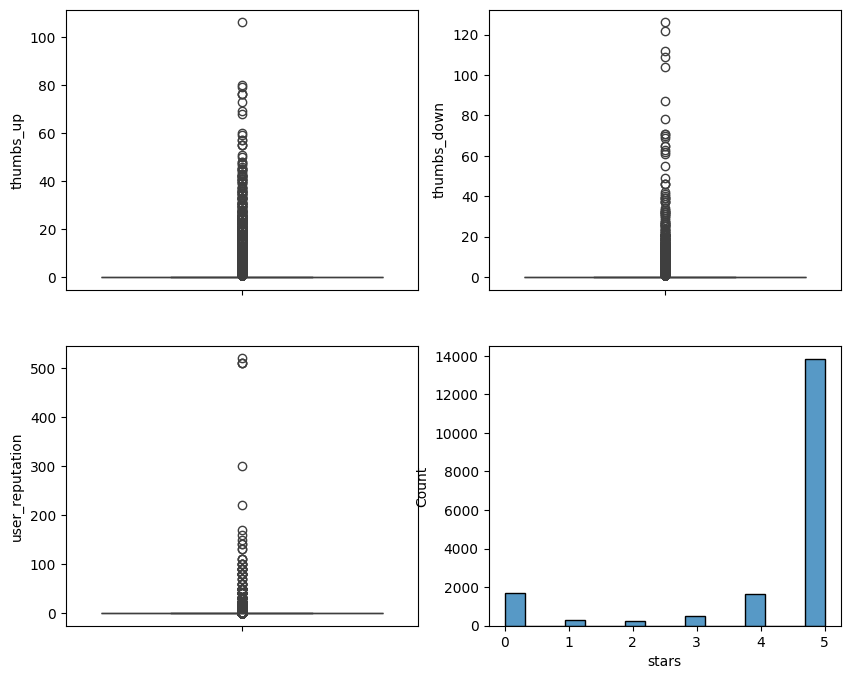

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,8))

sns.boxplot(df['thumbs_up'], ax=ax1)
sns.boxplot(df['thumbs_down'], ax=ax2)
sns.boxplot(df['user_reputation'], ax=ax3)
sns.histplot(df['stars'], ax=ax4)

<Axes: xlabel='best_score', ylabel='Count'>

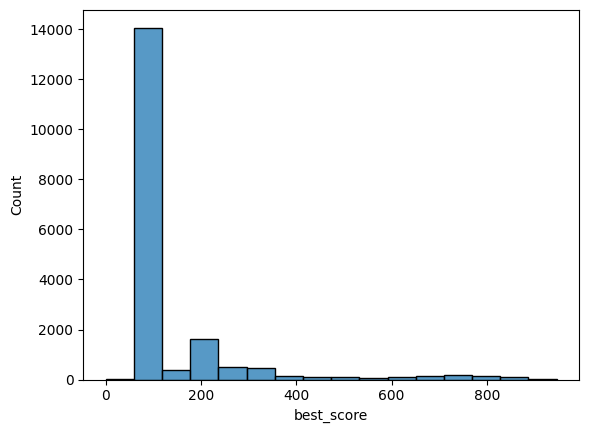

In [ ]:
sns.histplot(df['best_score'])

/var/folders/0q/z048sjx17mz9yrftyzsvw98r0000gp/T/ipykernel_52967/3393906911.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  comment_volume = df.groupby(df['created_at_utc'].dt.to_period('M')).size().reset_index(name='comment_count')


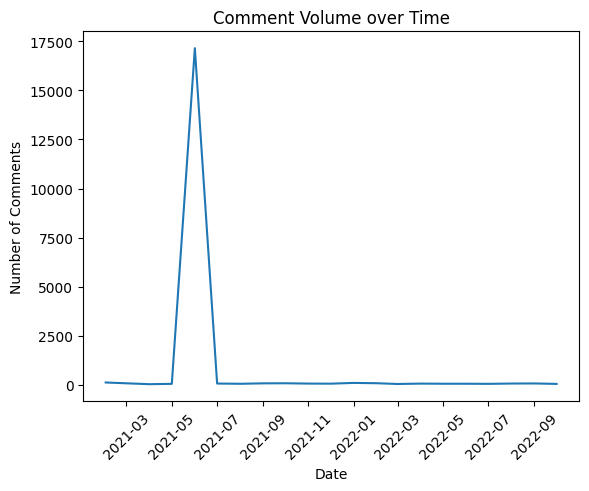

In [ ]:
comment_volume = df.groupby(df['created_at_utc'].dt.to_period('M')).size().reset_index(name='comment_count')

plt.plot(comment_volume['created_at_utc'].dt.to_timestamp(), comment_volume['comment_count'])
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Number of Comments')
plt.title('Comment Volume over Time')
plt.show()

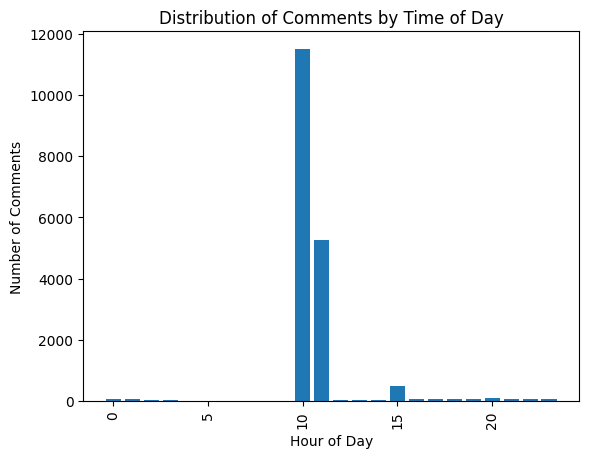

In [ ]:
#Majority of comments occur at 10/11 am (Before lunch time to prep the recipe???)

df['hour'] = df['created_at_utc'].dt.hour

hourly_distribution = df.groupby('hour').size().reset_index(name='comment_count')

#Plot the distribution
plt.bar(hourly_distribution['hour'], hourly_distribution['comment_count'])
plt.xlabel('Hour of Day')
plt.xticks(rotation=90)
plt.ylabel('Number of Comments')
plt.title('Distribution of Comments by Time of Day')
plt.show()

/var/folders/0q/z048sjx17mz9yrftyzsvw98r0000gp/T/ipykernel_52967/1347201158.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  recipe_timeline = df.groupby([df['created_at_utc'].dt.to_period('W'), 'recipe_number']).size().unstack(fill_value=0)


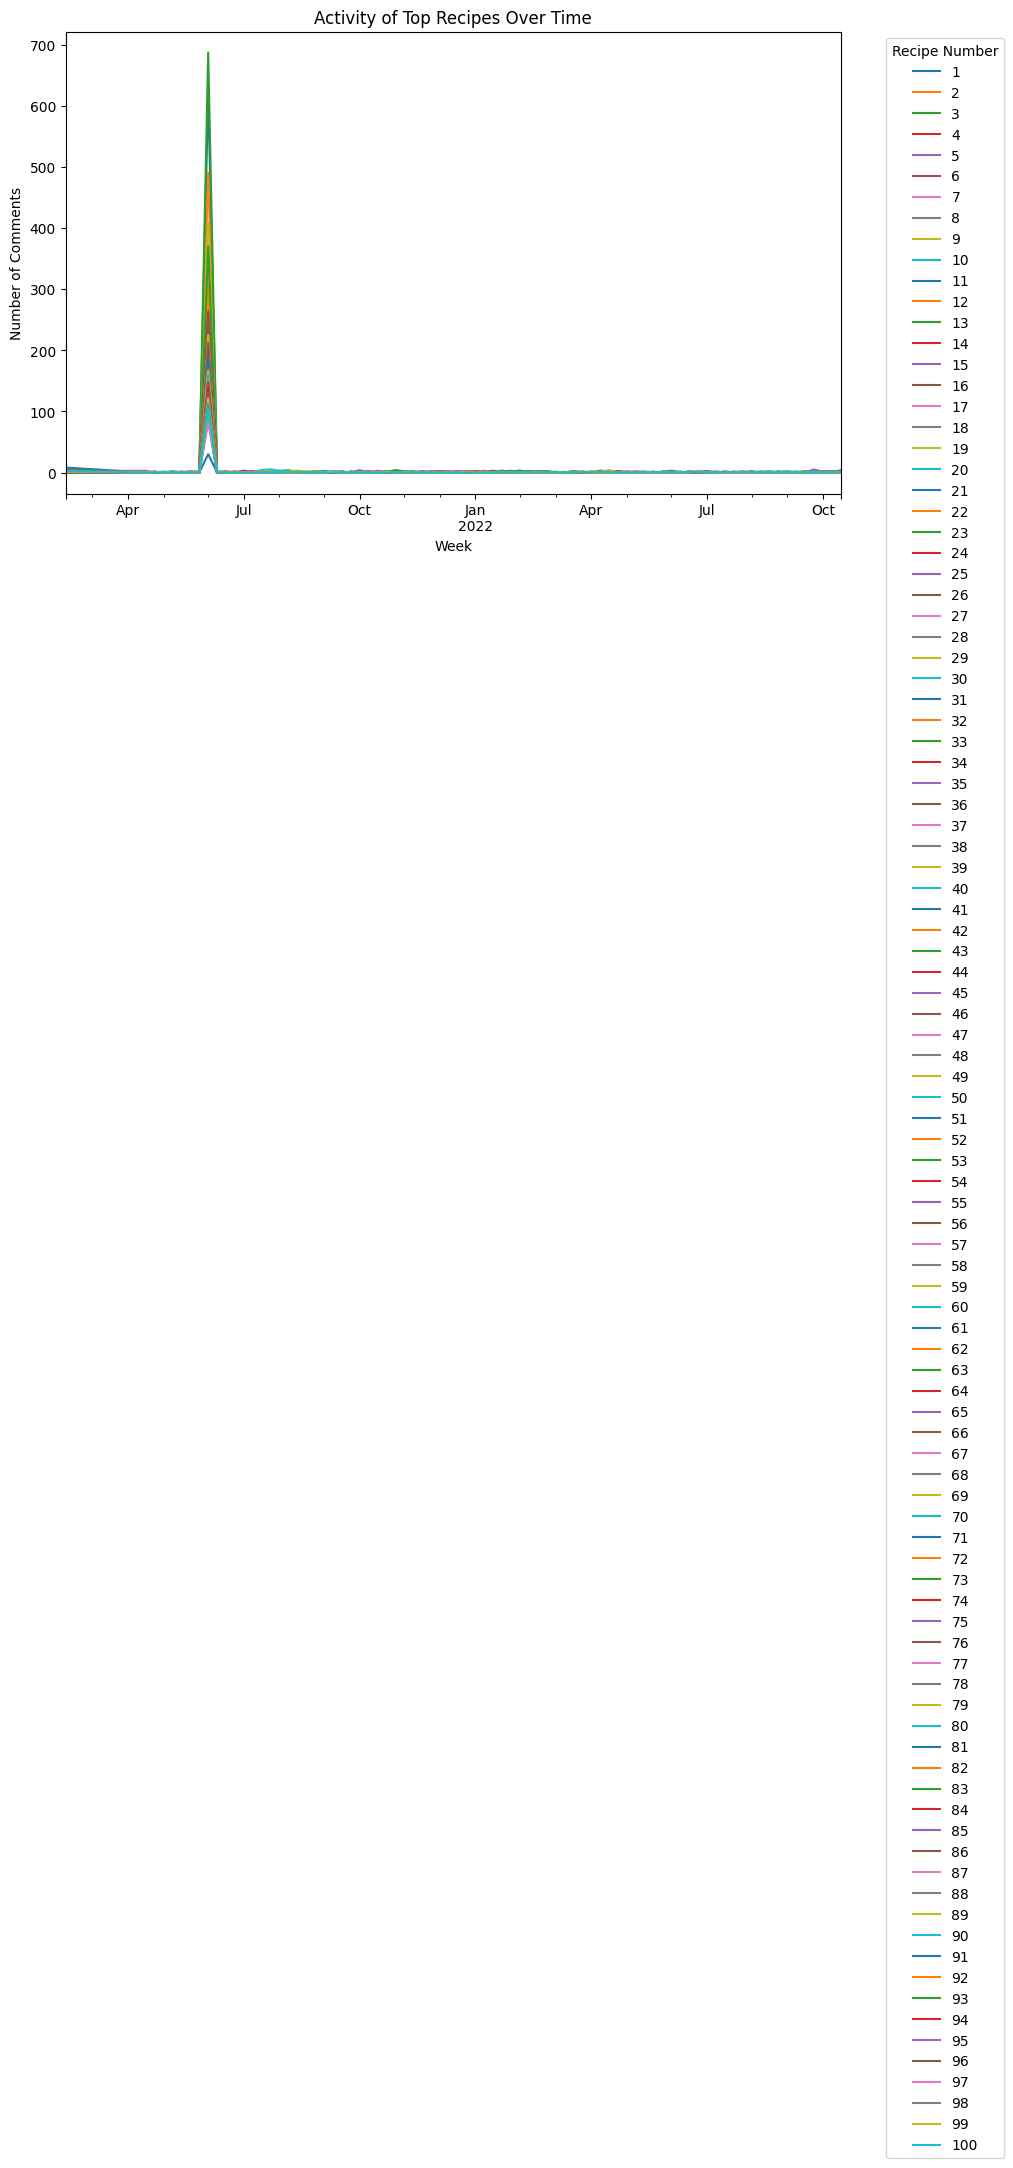

In [ ]:
# All the comments were happening in June

# Group by recipe_number and week
recipe_timeline = df.groupby([df['created_at_utc'].dt.to_period('W'), 'recipe_number']).size().unstack(fill_value=0)

# Plot the activity of top recipes
recipe_timeline.plot(figsize=(10, 6))
plt.xlabel('Week')
plt.ylabel('Number of Comments')
plt.title('Activity of Top Recipes Over Time')
plt.legend(title='Recipe Number', bbox_to_anchor=(1.05, 1))
plt.show()

/var/folders/0q/z048sjx17mz9yrftyzsvw98r0000gp/T/ipykernel_52967/3186132810.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  sentiment_trend = df.groupby(df['created_at_utc'].dt.to_period('D'))['sentiment'].mean().reset_index()


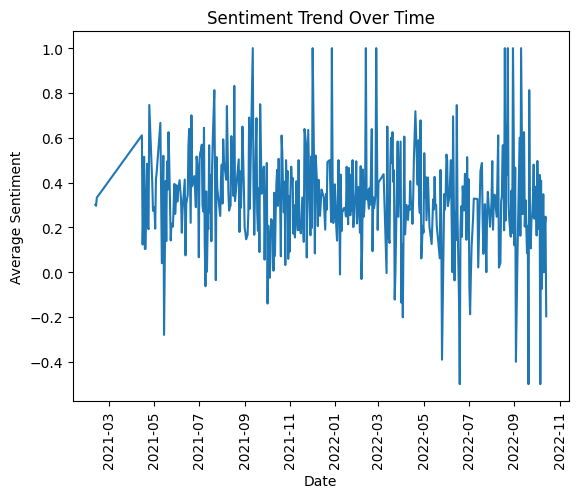

In [ ]:
from textblob import TextBlob

# Calculate sentiment polarity for each comment
df['sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Group by day and calculate average sentiment
sentiment_trend = df.groupby(df['created_at_utc'].dt.to_period('D'))['sentiment'].mean().reset_index()

# Plot sentiment over time
plt.plot(sentiment_trend['created_at_utc'].dt.to_timestamp(), sentiment_trend['sentiment'])
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Average Sentiment')
plt.title('Sentiment Trend Over Time')
plt.show()

/var/folders/0q/z048sjx17mz9yrftyzsvw98r0000gp/T/ipykernel_52967/3596706388.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  metrics_trend = df.groupby(df['created_at_utc'].dt.to_period('D'))[['reply_count', 'thumbs_up', 'thumbs_down']].mean().reset_index()


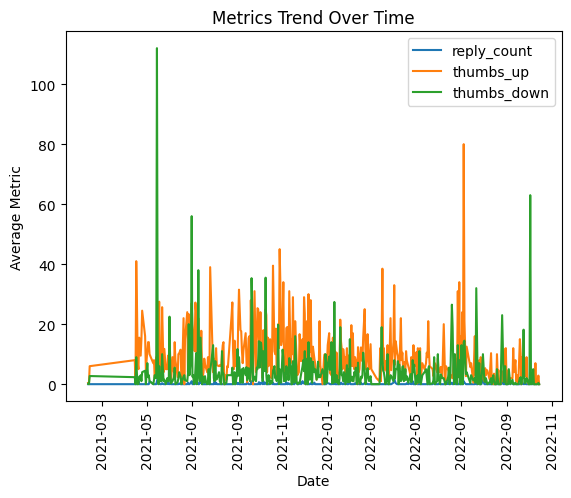

In [ ]:
# Group by day and calculate averages
metrics_trend = df.groupby(df['created_at_utc'].dt.to_period('D'))[['reply_count', 'thumbs_up', 'thumbs_down']].mean().reset_index()

# Plot each metric over time
for metric in ['reply_count', 'thumbs_up', 'thumbs_down']:
    plt.plot(metrics_trend['created_at_utc'].dt.to_timestamp(), metrics_trend[metric], label=metric)

plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Average Metric')
plt.title('Metrics Trend Over Time')
plt.legend()
plt.show()

In [ ]:
# Sort the dataset by 'thumbs_up' in descending order
top_thumbs_up_comments = df.sort_values(by='thumbs_up', ascending=False)

# Select relevant columns to display (including recipe_number and the full text comment)
top_comments = top_thumbs_up_comments[['recipe_number', 'text', 'thumbs_up']].head(30)

# Display the top comments with the highest thumbs up
top_comments.reset_index()

,index,recipe_number,text,thumbs_up
0,15852,81,"Good,easy recipe. For all u snarky bullies who...",106
1,14778,73,Fat Free Half and Half is not Half and Half. I...,80
2,13347,62,I enjoys these reviews. Rarely make the recipe...,79
3,16497,86,"I like the ingredients and portions, but this ...",76
4,16877,89,I remember a time long long ago lol..when my m...,76
5,4191,11,As with any recipe one tends to adjust to thei...,76
6,4473,12,I really liked this recipe and so did most of ...,73
7,1192,3,This looks delicious. If I want to make it in...,69
8,3433,9,I&#39;m always surprised when someone changes ...,68
9,17010,90,Made it for company tonight! I served it warm...,60


### Predict User Ratings (Stars) Based on the Review Text - Multi-Class Classification

### Classify User Sentiment using Neural Networks